# SAT & ACT Analysis - Where to Focus for Increasing Participation Rates

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-&-Cleaning)
- [2018 Data Import & Cleaning](#2018-Data-Import-&-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement

The College Board, the non-profit which creates and administers the SAT, wants insights on how they might increase participation in the test among US students. The data available pertain to the SAT and also the ACT which is a competing assessment not administered by the College Board.

### Description of Data

Available are four tables of data that outline the test scores and participation rates by state (plus Washington DC) of the SAT and the ACT for the years 2017 and 2018. Each of the four datasets have about 51 rows. Except for pertaining to the ACT 2017, the scores are broken down by subject, as well as given as totals/composites. Combined into one table, the data is as outlined in the data dictionary below.

SAT 2017 range of possible scores: 400 - 1600 <br/>
ACT 2017 range of possible scores: 1 - 36

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|act_2017 & sat_2017|Includes all U.S. states and Washington D.C.|
|participation_act17|float|act_2017|Percentage in decimal form of student participation in the ACT test.| 
|english_act17|float|act_2017|Average english score for the ACT (by state).| 
|math_act17|float|act_2017|Average math score for the ACT (by state).| 
|reading_act17|float|act_2017|Average reading score for the ACT (by state).| 
|science_act17|float|act_2017|Average science score for the ACT (by state).| 
|composite_act17|float|act_2017|Average total score (all other subtests added together).| 
|participation_sat17|float|sat_2017|Percentage in decimal form of student participation in the SAT test.| 
|language_sat17|int|sat_2017|Average evidence-based reading and writing score for the SAT (by state).| 
|math_sat17|int|sat_2017|Average math score for the SAT (by state).| 
|total_sat17|int|sat_2017|Average total score for the SAT (by state).| 



In [3]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## 2017 Data Import & Cleaning

#### Read In SAT & ACT  Data

In [4]:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

In [5]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
act_2017.describe().round(2)

,English,Math,Reading,Science
count,52.00,52.00,52.00,52.00
mean,20.92,21.17,22.00,21.04
std,2.33,1.96,2.05,3.15
min,16.30,18.00,18.10,2.30
25%,19.00,19.40,20.48,19.90
50%,20.55,20.90,21.70,21.15
75%,23.30,23.10,24.13,22.52
max,25.50,25.30,26.00,24.90


In [7]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [8]:
sat_2017.describe().round(2)

,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00
mean,569.12,547.63,1126.10
std,45.67,84.91,92.49
min,482.00,52.00,950.00
25%,533.50,522.00,1055.50
50%,559.00,548.00,1107.00
75%,613.00,599.00,1212.00
max,644.00,651.00,1295.00


In [9]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [10]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
sat_2017.at[20,'Math'] = 530 
act_2017.at[21,'Science'] = 23.1 

#https://news.maryland.gov/msde/new-sat-sets-baseline-act-scores-rise-in-maryland/
#https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf

In [12]:
sat_2017.dtypes
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

#### Fix Incorrect Data Types

In [13]:
#Change percentages from objects to floats
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: int(x[:-1])/100)
act_2017['Participation'] = act_2017['Participation'].map(lambda x: int(x[:-1])/100)

In [14]:
# fix one corrupt value and change dtype of "Composite" column to float
act_2017.at[51, "Composite"] = act_2017.at[51, "Composite"].strip("x")
act_2017['Composite'] = act_2017['Composite'].map(lambda x: float(x))

In [1]:
act_2017['Composite'][51]

NameError: name 'act_2017' is not defined

In [16]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### Rename Columns

In [17]:
labels_act = {'State':'state',
 'Participation':'participation_act17',
 'English':'english_act17',
 'Math':'math_act17',
 'Reading':'reading_act17',
 'Science':'science_act17',           
 'Composite':'composite_act17'}
labels_sat = {'State':'state',
 'Participation':'participation_sat17',
 'Evidence-Based Reading and Writing':'language_sat17',
 'Math':'math_sat17',
 'Total':'total_sat17'}
act_2017.rename(columns=labels_act, inplace=True)
sat_2017.rename(columns=labels_sat, inplace=True)
sat_2017.dtypes

state                   object
participation_sat17    float64
language_sat17           int64
math_sat17               int64
total_sat17              int64
dtype: object

#### Drop unnecessary rows

In [18]:
act_2017.drop(labels=[0], inplace=True)
act_2017.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


In [19]:
tests_2017 = pd.merge(act_2017, sat_2017, on="state")

In [20]:
#example cars.loc[cars['mpg'] > 30, :].to_csv('output/efficient-cars.csv', index=False)
tests_2017.to_csv('combined_2017.csv')

## 2018 Data Import & Cleaning

In [21]:
sat_2018 = pd.read_csv("../data/sat_2018.csv")
act_2018 = pd.read_csv("../data/act_2018.csv")

In [22]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [23]:
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [24]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [25]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [26]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [27]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [28]:
#rename columns
labels_act_18 = {'State':'state',
 'Participation':'participation_act18',           
 'Composite':'composite_act18'}
labels_sat_18 = {'State':'state',
 'Participation':'participation_sat18',
 'Evidence-Based Reading and Writing':'language_sat18',
 'Math':'math_sat18',
 'Total':'total_sat18'}
act_2018.rename(columns=labels_act_18, inplace=True)
sat_2018.rename(columns=labels_sat_18, inplace=True)

In [29]:
#convert participation column type from object to float (decimal form percentage)
sat_2018['participation_sat18'] = sat_2018['participation_sat18'].map(lambda x: int(x.strip('%'))/100)
act_2018['participation_act18'] = act_2018['participation_act18'].map(lambda x: int(x.strip('%'))/100)

In [30]:
#remove duplicate row in ACT 2018 data
act_2018.drop(labels=[20], inplace=True)

In [31]:
act_2018.head(25)

,state,participation_act18,composite_act18
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7
5,Colorado,0.30,23.9
6,Connecticut,0.26,25.6
7,Delaware,0.17,23.8
8,District of columbia,0.32,23.6
9,Florida,0.66,19.9


In [32]:
sat_2018.head()

,state,participation_sat18,language_sat18,math_sat18,total_sat18
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [33]:
sat_2018.dtypes

state                   object
participation_sat18    float64
language_sat18           int64
math_sat18               int64
total_sat18              int64
dtype: object

In [34]:
act_2018.dtypes

state                   object
participation_act18    float64
composite_act18        float64
dtype: object

#### Combine 2017 and 2018 data into a single dataframe


In [35]:
tests_2018 = pd.merge(act_2018, sat_2018, on="state")
tests_2018.head()

,state,participation_act18,composite_act18,participation_sat18,language_sat18,math_sat18,total_sat18
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1169
4,California,0.27,22.7,0.60,540,536,1076


In [36]:
tests_2017_2018 = pd.merge(tests_2017, tests_2018, on="state")
tests_2017_2018.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,language_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,language_sat18,math_sat18,total_sat18
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1169
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [37]:
tests_2017_2018.dtypes

state                   object
participation_act17    float64
english_act17          float64
math_act17             float64
reading_act17          float64
science_act17          float64
composite_act17        float64
participation_sat17    float64
language_sat17           int64
math_sat17               int64
total_sat17              int64
participation_act18    float64
composite_act18        float64
participation_sat18    float64
language_sat18           int64
math_sat18               int64
total_sat18              int64
dtype: object

## Exploratory Data Analysis


### Summary Statistics


In [38]:
tests_2017_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act17,50.0,0.6592,0.321107,0.08,0.3100,0.71,1.000,1.0
english_act17,50.0,20.8620,2.324307,16.30,19.0000,20.55,23.100,25.5
math_act17,50.0,21.1360,1.973990,18.00,19.4000,20.90,23.000,25.3
reading_act17,50.0,21.9560,2.046317,18.10,20.4250,21.70,23.875,26.0
science_act17,50.0,21.4080,1.729910,18.20,19.9250,21.30,22.900,24.9
composite_act17,50.0,21.4660,2.004241,17.80,19.8000,21.40,23.400,25.5
participation_sat17,50.0,0.3860,0.345602,0.02,0.0400,0.34,0.650,1.0
language_sat17,50.0,570.8600,44.385146,503.00,535.2500,559.50,613.500,644.0
math_sat17,50.0,558.7800,45.755022,492.00,524.0000,549.50,601.000,651.0
total_sat17,50.0,1129.6200,89.913085,996.00,1057.0000,1107.50,1214.000,1295.0


In [39]:
tests_2017_2018.isnull().sum()

state                  0
participation_act17    0
english_act17          0
math_act17             0
reading_act17          0
science_act17          0
composite_act17        0
participation_sat17    0
language_sat17         0
math_sat17             0
total_sat17            0
participation_act18    0
composite_act18        0
participation_sat18    0
language_sat18         0
math_sat18             0
total_sat18            0
dtype: int64

#### Manually calculate standard deviation

In [40]:
def stddev(series):
    mean = sum(series)/len(series)
    n = len(series)
    to_sum = 0
    for i in series:
        to_sum += (i - mean)**2
    std_dev = ((1/n)*to_sum)**.5
    return std_dev

In [41]:
stddev_dict = {col:stddev(tests_2017_2018[col]) for col in tests_2017_2018.columns if col != 'state'}
stddev_dict

{'participation_act17': 0.3178794740149165,
 'english_act17': 2.3009467616613812,
 'math_act17': 1.9541504548012678,
 'reading_act17': 2.025750231395766,
 'science_act17': 1.7125232845132352,
 'composite_act17': 1.9840977798485642,
 'participation_sat17': 0.3421286307808805,
 'language_sat17': 43.93905324423821,
 'math_sat17': 45.295160889437184,
 'total_sat17': 89.00941298536914,
 'participation_act18': 0.33771254048376703,
 'composite_act18': 2.090091864009809,
 'participation_sat18': 0.36724754594142633,
 'language_sat18': 46.537937212558106,
 'math_sat18': 46.51518461749884,
 'total_sat18': 91.91248881408882}

In [42]:
tests_2017_2018.head()
tests_2017_2018.dtypes

state                   object
participation_act17    float64
english_act17          float64
math_act17             float64
reading_act17          float64
science_act17          float64
composite_act17        float64
participation_sat17    float64
language_sat17           int64
math_sat17               int64
total_sat17              int64
participation_act18    float64
composite_act18        float64
participation_sat18    float64
language_sat18           int64
math_sat18               int64
total_sat18              int64
dtype: object

In [43]:
tests_2017_2018.loc[:,['state','participation_act17']]#.sort_values(by='participation_act17')

,state,participation_act17
0,Alabama,1.00
1,Alaska,0.65
2,Arizona,0.62
3,Arkansas,1.00
4,California,0.31
5,Colorado,1.00
6,Connecticut,0.31
7,Delaware,0.18
8,Florida,0.73
9,Georgia,0.55


## Data Visualization

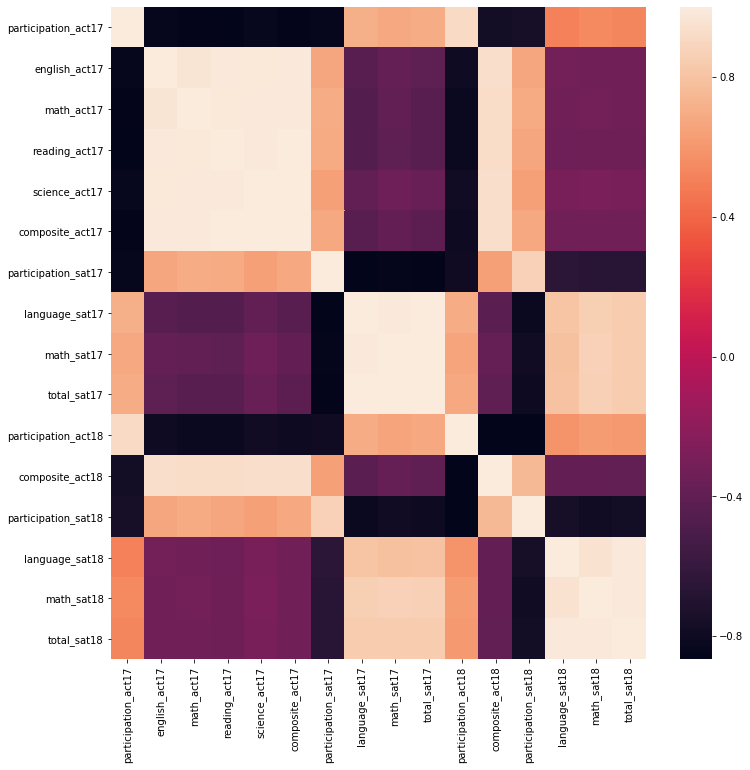

In [44]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(tests_2017_2018.corr());

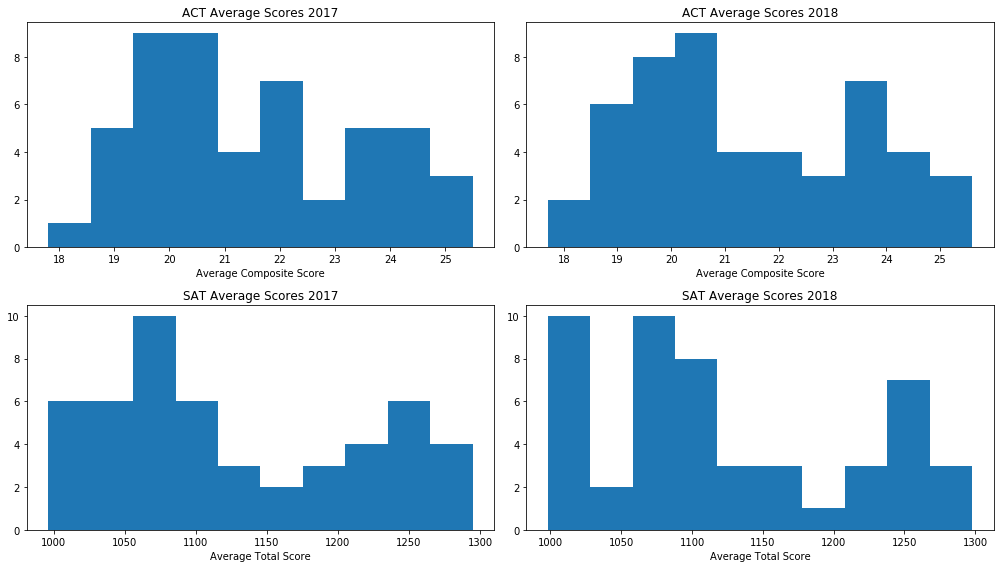

In [45]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,8)) 
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
    fig.tight_layout()
subplot_histograms(tests_2017_2018, ['composite_act17', 'composite_act18', 'total_sat17', 'total_sat18'], ["ACT Average Scores 2017", "ACT Average Scores 2018","SAT Average Scores 2017", "SAT Average Scores 2018"],["Average Composite Score","Average Composite Score", "Average Total Score", "Average Total Score" ])

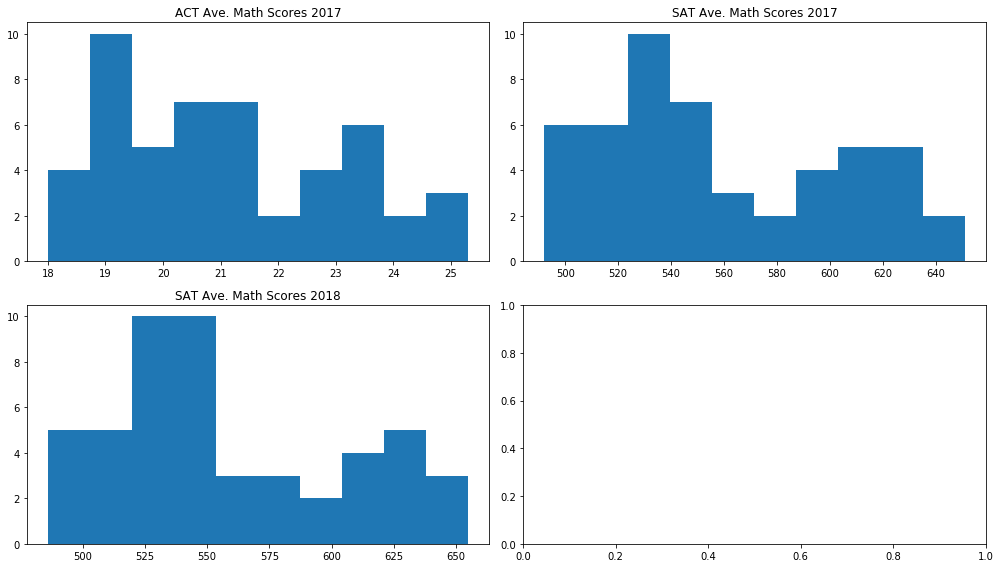

In [46]:
subplot_histograms(tests_2017_2018, ['math_act17', 'math_sat17', 'math_sat18'], 
                   ["ACT Ave. Math Scores 2017", "SAT Ave. Math Scores 2017", "SAT Ave. Math Scores 2018"],["","", "", "" ])

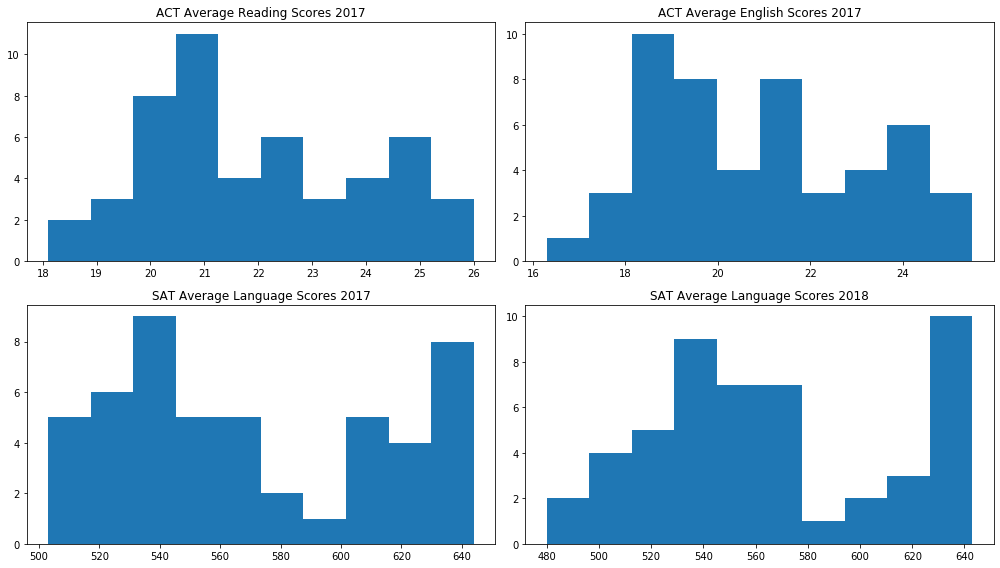

In [47]:
subplot_histograms(tests_2017_2018, ['reading_act17','english_act17', 'language_sat17', 
                                     'language_sat18'], 
                                    ["ACT Average Reading Scores 2017","ACT Average English Scores 2017",
                                     "SAT Average Language Scores 2017", "SAT Average Language Scores 2018"],
                                    ["","","","" ])

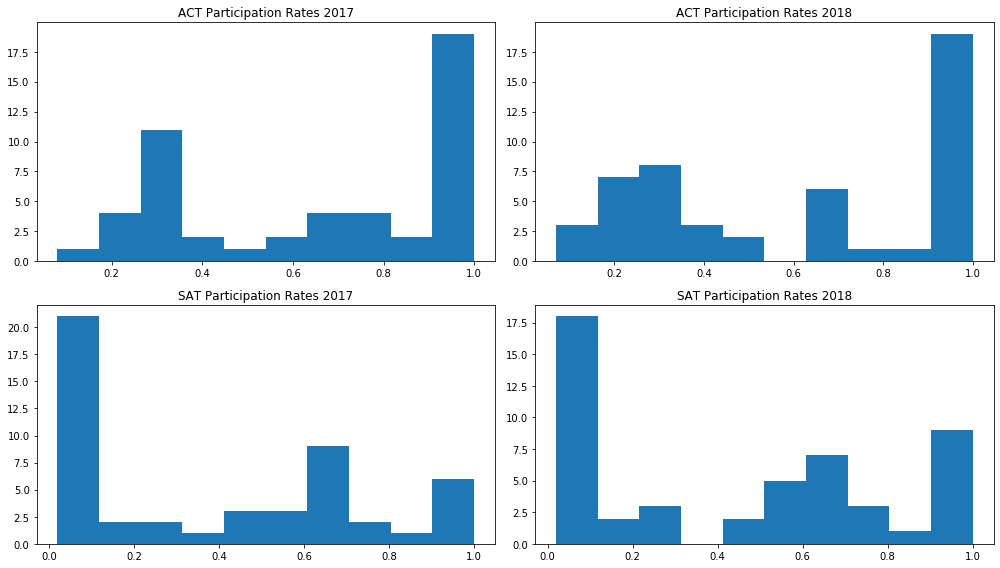

In [48]:
subplot_histograms(tests_2017_2018, ['participation_act17', 'participation_act18', 'participation_sat17', 'participation_sat18'], ["ACT Participation Rates 2017", "ACT Participation Rates 2018","SAT Participation Rates 2017", "SAT Participation Rates 2018"],["","", "", "" ])

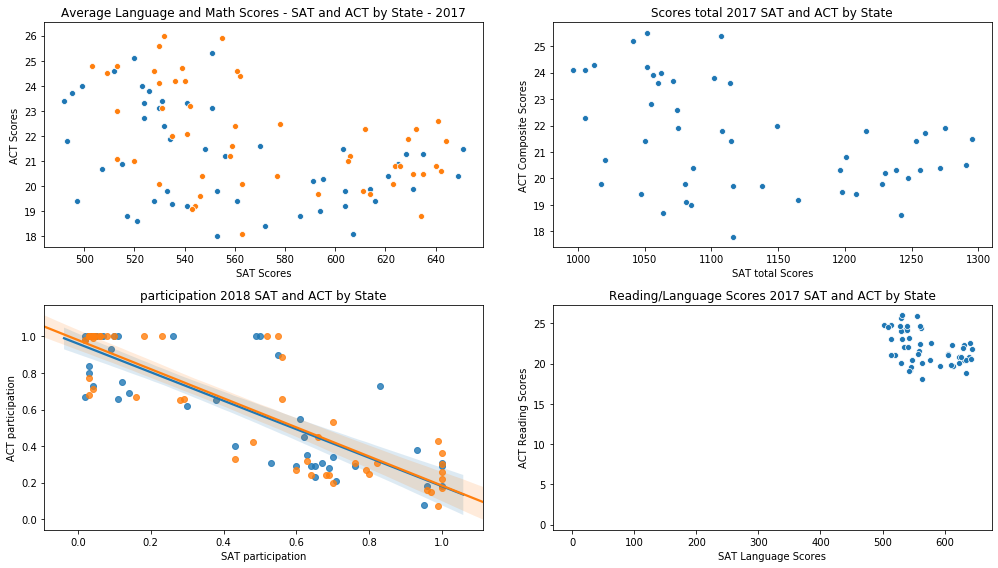

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8)) # You'll want to specify your figsize

sns.scatterplot(x=tests_2017_2018['math_sat17'], y=tests_2017_2018['math_act17'], ax=ax[0][0])
ax[0][0].set_xlabel('SAT Math Scores')
ax[0][0].set_ylabel('ACT Math Scores')
ax[0][0].set_title('Math Scores 2017 SAT and ACT by State')
#plt.legend(loc = 'upper left')

sns.scatterplot(x=tests_2017_2018['language_sat17'], y=tests_2017_2018['reading_act17'], ax=ax[0][0])
ax[0][0].set_xlabel('SAT Scores')
ax[0][0].set_ylabel('ACT Scores')
ax[0][0].set_title('Average Language and Math Scores - SAT and ACT by State - 2017')

sns.scatterplot(x=tests_2017_2018['total_sat17'], y=tests_2017_2018['composite_act17'], ax=ax[0][1])
ax[0][1].set_xlabel('SAT total Scores')
ax[0][1].set_ylabel('ACT Composite Scores')
ax[0][1].set_title('Scores total 2017 SAT and ACT by State')

sns.regplot(x=tests_2017_2018['participation_sat17'], y=tests_2017_2018['participation_act17'], ax=ax[1][0])
ax[1][0].set_xlabel('SAT participation')
ax[1][0].set_ylabel('ACT participation')
ax[1][0].set_title('participation 2017 SAT and ACT by State')

sns.regplot(x=tests_2017_2018['participation_sat18'], y=tests_2017_2018['participation_act18'], ax=ax[1][0])
ax[1][0].set_xlabel('SAT participation')
ax[1][0].set_ylabel('ACT participation')
ax[1][0].set_title('participation 2018 SAT and ACT by State')


sns.scatterplot(x=tests_2017_2018['language_sat17'], y=tests_2017_2018['reading_act17'], ax=ax[1][1])
ax[1][1].set_xlabel('SAT Language Scores')
ax[1][1].set_ylabel('ACT Reading Scores')
ax[1][1].set_title('Reading/Language Scores 2017 SAT and ACT by State')


fig.tight_layout()

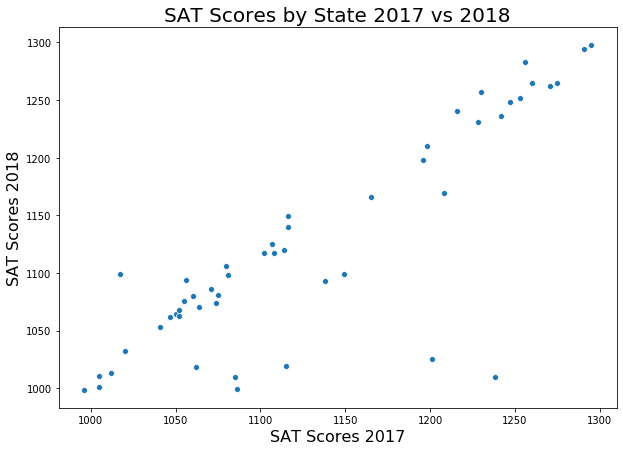

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7)) # You'll want to specify your figsize

sns.scatterplot(x=tests_2017_2018['total_sat17'], y=tests_2017_2018['total_sat18'], ax=ax)
ax.set_xlabel('SAT Scores 2017', size=16)
ax.set_ylabel('SAT Scores 2018', size=16)
ax.set_title('SAT Scores by State 2017 vs 2018', size=20)

plt.savefig('SAT-scores_17-18.png')

# sns.scatterplot(x=tests_2017_2018['participation_sat17'], y=tests_2017_2018['participation_sat18'], ax=ax)
# ax.set_xlabel('SAT Scores 2017', size=16)
# ax.set_ylabel('SAT Scores 2018', size=16)
# ax.set_title('SAT Scores by State 2017 vs 2018', size=20)


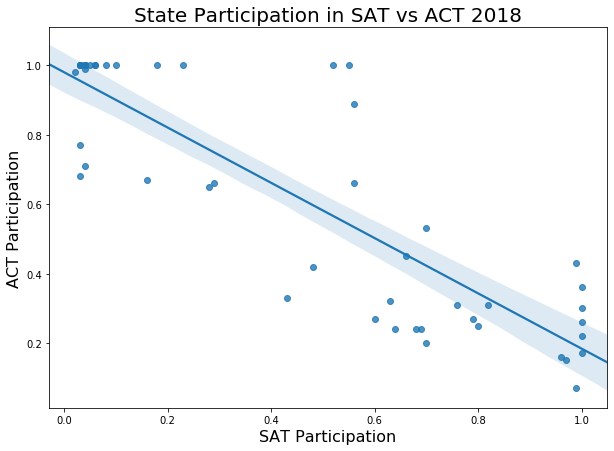

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7)) # You'll want to specify your figsize

sns.regplot(x=tests_2017_2018['participation_sat18'], y=tests_2017_2018['participation_act18'], ax=ax)
ax.set_xlabel('SAT Participation', size=16)
ax.set_ylabel('ACT Participation', size=16)
ax.set_title('State Participation in SAT vs ACT 2018', size=20)

plt.savefig('SAT-act-participation.png')


Text(0.5, 1.0, 'ACT Scores by State 2017 vs 2018')

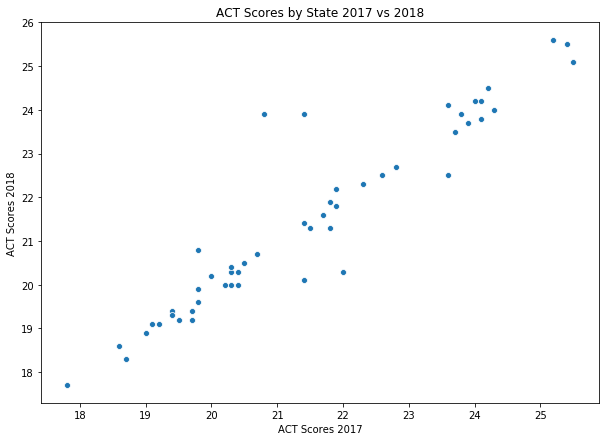

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7)) # You'll want to specify your figsize
sns.scatterplot(x=tests_2017_2018['composite_act17'], y=tests_2017_2018['composite_act18'], ax=ax)
ax.set_xlabel('ACT Scores 2017')
ax.set_ylabel('ACT Scores 2018')
ax.set_title('ACT Scores by State 2017 vs 2018')

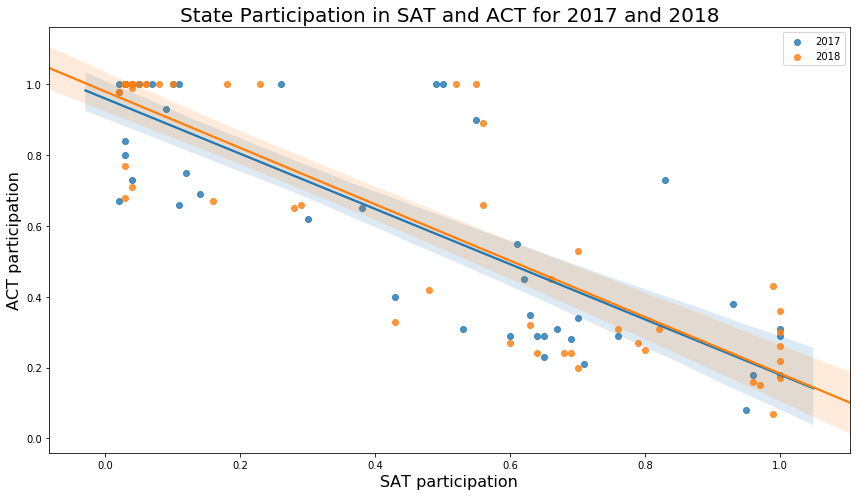

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7)) # You'll want to specify your figsize

sns.regplot(x=tests_2017_2018['participation_sat17'], y=tests_2017_2018['participation_act17'], ax=ax, label="2017")
ax.set_xlabel('SAT participation')
ax.set_ylabel('ACT participation')
ax.set_title('participation 2017 SAT and ACT by State')
plt.legend(loc = 'upper right')

sns.regplot(x=tests_2017_2018['participation_sat18'], y=tests_2017_2018['participation_act18'], ax=ax, label="2018")
ax.set_xlabel('SAT participation', size=16)
ax.set_ylabel('ACT participation', size=16)
ax.set_title('State Participation in SAT and ACT for 2017 and 2018', size=20)
plt.legend(loc = 'upper right')


fig.tight_layout()
plt.savefig('participation-comparison.png')

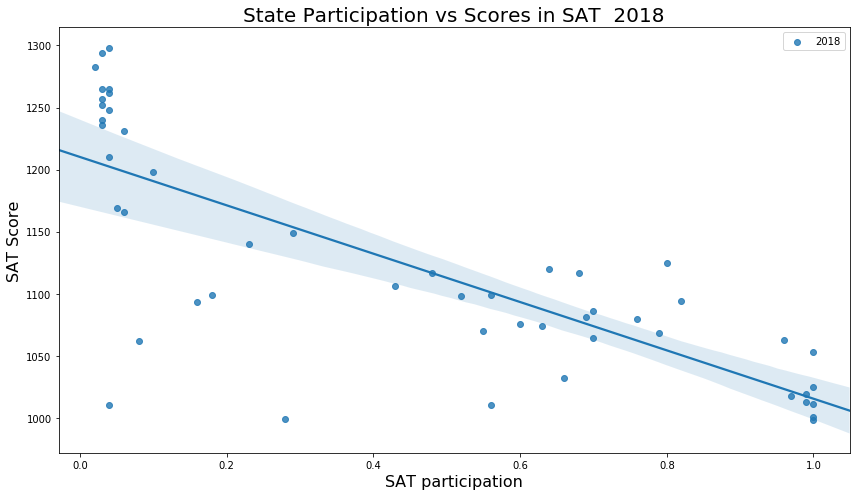

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,7)) # You'll want to specify your figsize

sns.regplot(x=tests_2017_2018['participation_sat18'], y=tests_2017_2018['total_sat18'], ax=ax, label="2018")
ax.set_xlabel('SAT participation', size=16)
ax.set_ylabel('SAT Score', size=16)
ax.set_title('State Participation vs Scores in SAT  2018', size=20)
plt.legend(loc = 'upper right')


fig.tight_layout()
plt.savefig('participation-score-sat.png')

In [55]:
mask = ((tests_2017_2018['total_sat17'] >= 1200) & (tests_2017_2018['total_sat17'] <= 1250)) & ((tests_2017_2018['total_sat18'] <= 1050))
tests_2017_2018.loc[mask,['state','total_sat17','total_sat18']]

,state,total_sat17,total_sat18
5,Colorado,1201,1025
43,Utah,1238,1010


In [56]:
mask = (tests_2017_2018['participation_act18'] < .7) & (tests_2017_2018['participation_sat18'] > .4) & (tests_2017_2018['participation_sat18'] < .60) & (tests_2017_2018['participation_sat17'] < tests_2017_2018['participation_sat18'])
tests_2017_2018.loc[mask,['state','participation_sat17','participation_sat18','participation_act17', 'participation_act18']].sort_values(by='participation_sat18')

,state,participation_sat17,participation_sat18,participation_act17,participation_act18
1,Alaska,0.38,0.43,0.65,0.33
36,Oregon,0.43,0.48,0.40,0.42


In [57]:
# tests_2017_2018.loc[:,['state','composite_act17','composite_act18', 
#                        'total_sat17', 'total_sat18', 'participation_act17', 'participation_sat17',
#                        'participation_act18',
#                        'participation_sat18']].sort_values(by='participation_act17')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

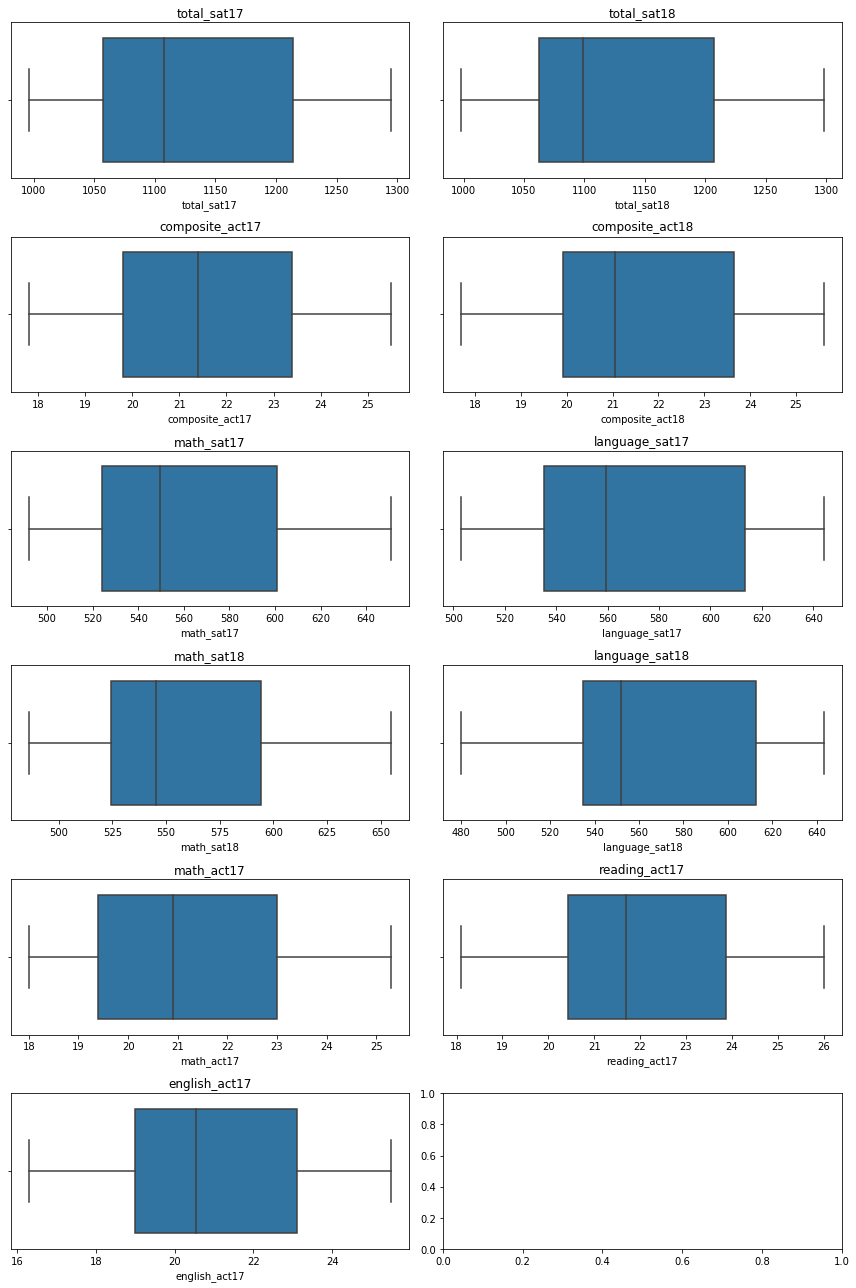

In [67]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,18)) # You'll want to specify your figsize

sns.boxplot(tests_2017_2018["total_sat17"], ax=ax[0][0])
ax[0][0].set_title('total_sat17')

sns.boxplot(tests_2017_2018["total_sat18"], ax=ax[0][1])
ax[0][1].set_title('total_sat18')

sns.boxplot(tests_2017_2018["composite_act17"], ax=ax[1][0])
ax[1][0].set_title('composite_act17')

sns.boxplot(tests_2017_2018["composite_act18"], ax=ax[1][1])
ax[1][1].set_title('composite_act18')

sns.boxplot(tests_2017_2018["math_sat17"], ax=ax[2][0])
ax[2][0].set_title('math_sat17')

sns.boxplot(tests_2017_2018["language_sat17"],ax=ax[2][1])
ax[2][1].set_title('language_sat17')

sns.boxplot(tests_2017_2018["math_sat18"], ax=ax[3][0])
ax[3][0].set_title('math_sat18')

sns.boxplot(tests_2017_2018["language_sat18"], ax=ax[3][1])
ax[3][1].set_title('language_sat18')

sns.boxplot(tests_2017_2018["math_act17"], ax=ax[4][0])
ax[4][0].set_title('math_act17')

sns.boxplot(tests_2017_2018["reading_act17"], ax=ax[4][1])
ax[4][1].set_title('reading_act17')

sns.boxplot(tests_2017_2018["english_act17"], ax=ax[5][0])
ax[5][0].set_title('english_act17')

fig.tight_layout();

## Outside Research

California, Oregon, Alaska don't have exceedingly strong participation in either test (broadly around 50% for each), but they do all have traction for SAT participation (~40-60% participation) and an increase in SAT participation (by 5-7%) for 2017-2018. This makes them sensible targets of focus for states in which we might try to increase percentage participation. California, being the largest of these three states by far, could have the greatest return on investment. Because California is a left leaning and very diverse state, the College Board should keep up a strong focus on equity and inclusion, evolving the test to be less biased toward students of a certain background, and fair access and incentives for underserved communities.

## Conclusions and Recommendations

-There's an inverse relationship between participation rates and test scores. Makes sense, many states make the tests madatory, resulting in a higher participation rate, reducing the opt-in bias that is probably responsible for high scores in states with low participation.

-There is a large spread in participation rates for both tests, with some states participating 100% and others below 10%, and some states had a huge change in participation rate due to policy and contracts between states and the College Board

-States tend to be polarized on which test they participate in. It makes sense to focus on getting 'market share' in states that have not yet chosen either the ACT or SAT. California is a great example of a potential high impact focus for increasing test takers. CA had an increase in SAT participation from 2017-2018 to 60%, and because it has such a huge population, there's a lot to gain from increasing statewide participation. Because CA is a diverse and left leaning state, and because it's the right thing to do, the College board should focus on fairness, access and inclusion for a culturally, linguistically and economically diverse population.
